Out of all the 3 types of gradient we have found that sgd will be the fastest, since the dataset used here is not soo much large therefore batch has runtime lower than sgd.

The slope is: [[1.02478773]] The intercept is: [0.10893336]


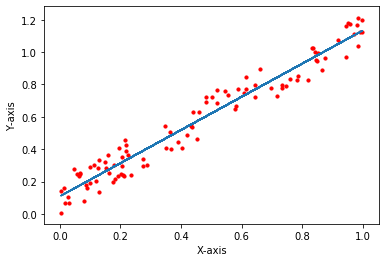

Run time:0.13460516929626465


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time


start_time = time.time()

x = np.random.random(100).reshape(-1, 1)
c = np.random.random(100).reshape(-1, 1)
m = 1

y = m * x + 0.25 * c


reg = LinearRegression().fit(x, y)
print('The slope is:', reg.coef_, 'The intercept is:', reg.intercept_)

p = reg.coef_[0][0]
q = reg.intercept_[0]

plt.plot(x, p * x + q)
plt.scatter(x, y, s=10, c='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


end_time = time.time()
print('Run time:'+(str)(end_time-start_time))

The required slope and intercept of loss function are: 1.0654068717447611 & 0.20177537114751334
The minimum value of the cost function 13.555263511367437


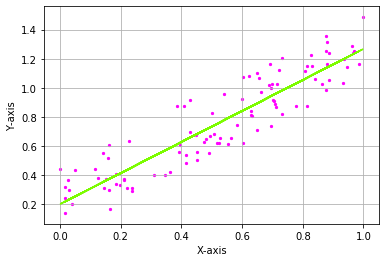

Run time:5.058304786682129


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time


start_time = time.time()

m = 1
x = np.random.random(100)
c = np.random.random(100)
y = m * x + 0.5*c              # Original points

N = len(y)

g = np.random.random()*10
b = np.random.random()*10



def batch(mp, cp, itr):
    k = 0
    yp = mp*x + cp                # Predicted points


    for i in range(1, N):
        k += (1/N)*(yp[i] - y[i])**2                # Loss function

    alpha = 0.01                # The weight or the hyper-parameter
    for j in range(itr):
        m_1 = 0
        c_1 = 0
        for i in range(1, N):
            m_1 += (2/N)*x[i]*(mp*x[i]+cp - y[i])               # Slope of loss function(w.r.t predicted slope)
            c_1 += (2/N)*(mp*x[i]+cp - y[i])                # Slope of loss function(w.r.t predicted intercept)

        mp = mp - alpha * m_1
        cp = cp - alpha * c_1

    return mp, cp, k


z = batch(g, b, 5000)[0]*x+batch(g, b, 5000)[1]

print('The required slope and intercept of loss function are:', batch(g, b, 5000) [0], '&', batch(g, b, 5000)[1])
print('The minimum value of the cost function', batch(g, b, 5000)[2])

plt.figure()
plt.scatter(x, y, s=5, c='magenta')
plt.plot(x, z, 'lawngreen')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()


end_time = time.time()
print('Run time:'+(str)(end_time-start_time))

The required slope and intercept of loss function are: 1.0239541191700514 & 0.25738987347774633
The minimum value of the cost function 0.01754968440308485


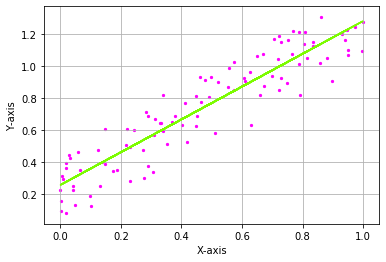

Run time:11.038069009780884


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time


start_time = time.time()

m = 1
x = np.random.random(100).reshape(10, 10)
c = np.random.random(100).reshape(10, 10)
y = m * x + 0.5*c              # Original points

N = 10

g = np.random.random()*10
b = np.random.random()*10



def mini_batch(mp, cp, itr):
    
    yp = mp*x + cp                # Predicted points
    
    for j in range(itr):
        for l in range(N):
            
            alpha = 0.01                # The weight or the hyper-parameter
            k = 0
            m_1 = 0
            c_1 = 0
            
            for i in range(N):
                k += (1/N)*(mp*x[l][i]+cp - y[l][i])**2                # Loss function


                m_1 += (2/N)*x[l][i]*(mp*x[l][i]+cp - y[l][i])               # Slope of loss function(w.r.t predicted slope)
                c_1 += (2/N)*(mp*x[l][i]+cp - y[l][i])                # Slope of loss function(w.r.t predicted intercept)

            mp = mp - alpha * m_1
            cp = cp - alpha * c_1

    return mp, cp, k


z = mini_batch(g, b, 5000)[0]*x+mini_batch(g, b, 5000)[1]

print('The required slope and intercept of loss function are:', mini_batch(g, b, 5000) [0], '&', mini_batch(g, b, 5000)[1])
print('The minimum value of the cost function', mini_batch(g, b, 5000)[2])

plt.figure()
plt.scatter(x, y, s=5, c='magenta')
plt.plot(x, z, 'lawngreen')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()


end_time = time.time()
print('Run time:'+(str)(end_time-start_time))

The required slope and intercept of loss function are: 1.0395879640723817 & 0.2494546570945605
The minimum value of the cost function 0.021869298341856424


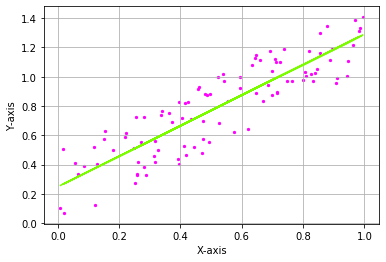

Run time:7.385257720947266


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time


start_time = time.time()

m = 1
x = np.random.random(100)
c = np.random.random(100)
y = m * x + 0.5*c              # Original points

N = 100

g = np.random.random()*10
b = np.random.random()*10



def sgd(mp, cp, itr):

    yp = mp*x + cp                # Predicted points
    
    for j in range(itr):

        alpha = 0.01                # The weight or the hyper-parameter
        k = 0
        m_1 = 0
        c_1 = 0
        
        for l in range(N):
            k += (1/N)*(mp*x[l]+cp - y[l])**2                # Loss function
            
            m_1 += (2/N)*x[l]*(mp*x[l]+cp - y[l])               # Slope of loss function(w.r.t predicted slope)
            c_1 += (2/N)*(mp*x[l]+cp - y[l])                # Slope of loss function(w.r.t predicted intercept)

        mp = mp - alpha * m_1
        cp = cp - alpha * c_1

    return mp, cp, k

    
    
z = sgd(g, b, 5000)[0]*x + sgd(g, b, 5000)[1]

print('The required slope and intercept of loss function are:', sgd(g, b, 5000) [0], '&', sgd(g, b, 5000)[1])
print('The minimum value of the cost function', sgd(g, b, 5000) [2])

plt.figure()
plt.scatter(x, y, s=5, c='magenta')
plt.plot(x, z, 'lawngreen')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()


end_time = time.time()
print('Run time:'+(str)(end_time-start_time))